### LOAN ELIGIBILITY PREDICTION -- THEOPHILUS YAO DORTUMOR

## IMPORTATION OF LIBRARIES

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

## IMPORTATION OF MODELS AND PACKAGES

In [2]:

import sklearn
#import imblearn 

from bioinfokit.analys import stat
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC

# Importation of Ensembles


from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import XGBClassifier

# Importation of Scalers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Importation of Pipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Importation of Performance Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score


## IMPORTING THE DATA SET

In [3]:
dataset = pd.read_excel("credit-data-training1.xlsx")

dataset.head(3)

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1


## DATA EXPLORATION

In [4]:
print("The dataset has {} rows and {} columns".format(dataset.shape[0], dataset.shape[1]))

The dataset has 500 rows and 20 columns


From this instance, the dataset has 500 rows with 21 columns which includes the target variable. 

#### CHECKING FOR MISSING VALUES

In [5]:
dataset.isnull().sum()

Credit-Application-Result              0
Account-Balance                        0
Duration-of-Credit-Month               0
Payment-Status-of-Previous-Credit      0
Purpose                                0
Credit-Amount                          0
Value-Savings-Stocks                   0
Length-of-current-employment           0
Instalment-per-cent                    0
Guarantors                             0
Duration-in-Current-address          344
Most-valuable-available-asset          0
Age-years                             12
Concurrent-Credits                     0
Type-of-apartment                      0
No-of-Credits-at-this-Bank             0
Occupation                             0
No-of-dependents                       0
Telephone                              0
Foreign-Worker                         0
dtype: int64

The inspection of the isnull() result reveals two columns having missing value They are Duration-in-Current-address and Duration-in-Current-address.
However, appropraite techniques would be applied to take care of them.

In [6]:
dataset.isnull().sum()/500*100

Credit-Application-Result             0.0
Account-Balance                       0.0
Duration-of-Credit-Month              0.0
Payment-Status-of-Previous-Credit     0.0
Purpose                               0.0
Credit-Amount                         0.0
Value-Savings-Stocks                  0.0
Length-of-current-employment          0.0
Instalment-per-cent                   0.0
Guarantors                            0.0
Duration-in-Current-address          68.8
Most-valuable-available-asset         0.0
Age-years                             2.4
Concurrent-Credits                    0.0
Type-of-apartment                     0.0
No-of-Credits-at-this-Bank            0.0
Occupation                            0.0
No-of-dependents                      0.0
Telephone                             0.0
Foreign-Worker                        0.0
dtype: float64

"The Duration-in-Current-address" has about 68.8% missing values which gives an indication that it may be drop as a predictor. However, for "Age-years", there are only 2.4% missing values and the appropriate technique would be deployed to take care of that.

### INSPECTION AND CLEANING OF CATEGORICAL VARIABLES

In [7]:
# Seperating categorical and numerical variables for individual exploration
categorical_var = dataset.select_dtypes(include = "object")
numerical_var = dataset.select_dtypes(include = np.number)

In [8]:
#Categoorical variables in perspective
for col in categorical_var.columns:
    print(col)

Credit-Application-Result
Account-Balance
Payment-Status-of-Previous-Credit
Purpose
Value-Savings-Stocks
Length-of-current-employment
Guarantors
Concurrent-Credits
No-of-Credits-at-this-Bank


In [9]:
# creating a function to explore the categorical variables

def explore_cat(dataset, c):
    unique_categories = dataset[c].nunique()
    if unique_categories <= 6:
        print("Summary")
        print("============")
        print(dataset[c].describe(),"\n")
        sns.countplot(dataset[c])
        plt.show()
        print("=============================================")
        print("value counts \n")
        print(dataset[c].value_counts(),"\n")
        print("=============================================")
        print("Missing values: {}".format(dataset[c].isnull().sum()))
        
    else:
        print("Summary")
        print("===========")
        print(dataset[c].describe(),"\n")
        sns.countplot(y=dataset[c])
        plt.show()
        print("=============================================")
        print("value counts \n")
        print(dataset[c].value_counts(),"\n")
        print("=============================================")
        print("Missing values: {}".format(dataset[c].isnull().sum()))

Summary
count              500
unique               2
top       Creditworthy
freq               358
Name: Credit-Application-Result, dtype: object 



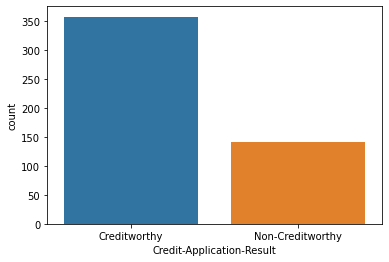

value counts 

Creditworthy        358
Non-Creditworthy    142
Name: Credit-Application-Result, dtype: int64 

Missing values: 0


In [10]:
explore_cat(dataset, "Credit-Application-Result")

An exploration of the "Credit-Application-Result" column shows there are two unique categories.

Those who were "Creditworthy" are far more than the "Non-Creditworthy" which shows that the data is not balanced.

This column however, does not a have a missing value.

Summary
count            500
unique             2
top       No Account
freq             262
Name: Account-Balance, dtype: object 



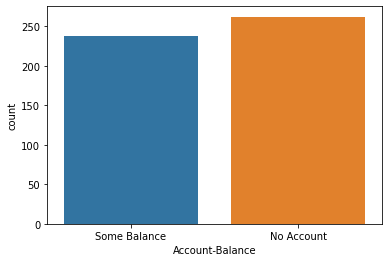

value counts 

No Account      262
Some Balance    238
Name: Account-Balance, dtype: int64 

Missing values: 0


In [11]:
explore_cat(dataset, "Account-Balance")

The difference between those who have "Some balance" and those who have "No account" is 26 which indicates a fair balance in this variable. 


Summary
count         500
unique          3
top       Paid Up
freq          260
Name: Payment-Status-of-Previous-Credit, dtype: object 



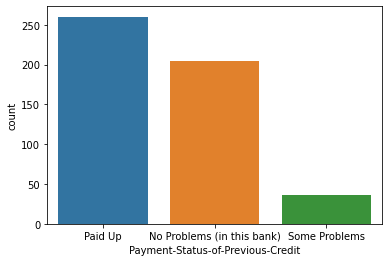

value counts 

Paid Up                       260
No Problems (in this bank)    204
Some Problems                  36
Name: Payment-Status-of-Previous-Credit, dtype: int64 

Missing values: 0


In [12]:
explore_cat(dataset, "Payment-Status-of-Previous-Credit")

Summary
count              500
unique               4
top       Home Related
freq               355
Name: Purpose, dtype: object 



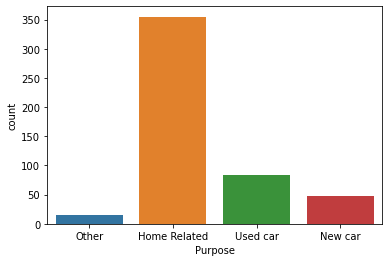

value counts 

Home Related    355
Used car         83
New car          47
Other            15
Name: Purpose, dtype: int64 

Missing values: 0


In [13]:
explore_cat(dataset, "Purpose")

Summary
count      500
unique       3
top       None
freq       298
Name: Value-Savings-Stocks, dtype: object 



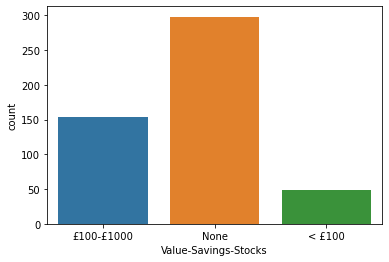

value counts 

None          298
£100-£1000    154
< £100         48
Name: Value-Savings-Stocks, dtype: int64 

Missing values: 0


In [14]:
explore_cat(dataset, "Value-Savings-Stocks")


Summary
count       500
unique        3
top       < 1yr
freq        279
Name: Length-of-current-employment, dtype: object 



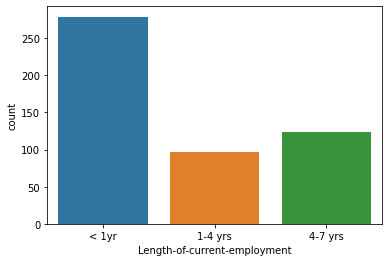

value counts 

< 1yr      279
4-7 yrs    124
1-4 yrs     97
Name: Length-of-current-employment, dtype: int64 

Missing values: 0


In [15]:
explore_cat(dataset,"Length-of-current-employment")


Summary
count      500
unique       2
top       None
freq       457
Name: Guarantors, dtype: object 



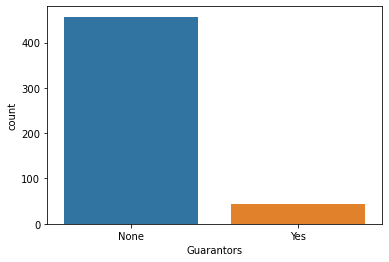

value counts 

None    457
Yes      43
Name: Guarantors, dtype: int64 

Missing values: 0


In [16]:
explore_cat(dataset, "Guarantors")

Summary
count                   500
unique                    1
top       Other Banks/Depts
freq                    500
Name: Concurrent-Credits, dtype: object 



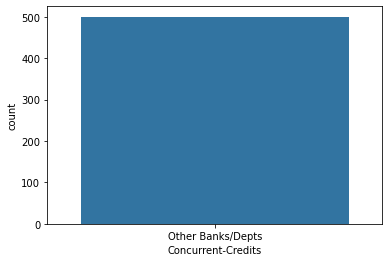

value counts 

Other Banks/Depts    500
Name: Concurrent-Credits, dtype: int64 

Missing values: 0


In [17]:
explore_cat(dataset, "Concurrent-Credits")

The Concurrent-credit variable has only one category which indicates no variability.

Due to this it would not be used in the prediction.


Summary
count     500
unique      2
top         1
freq      320
Name: No-of-Credits-at-this-Bank, dtype: object 



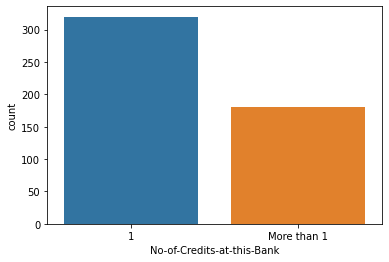

value counts 

1              320
More than 1    180
Name: No-of-Credits-at-this-Bank, dtype: int64 

Missing values: 0


In [18]:
explore_cat(dataset, "No-of-Credits-at-this-Bank") 

#### RELATIONSHIP BETWEEN CATEGORICAL VARIABLES 

In [19]:
#creating a test function


def test_association(df,x,y):
    table = pd.crosstab(df[x],df[y])
    test = stat()
    test.chisq(df = table)
    
    print("Null hypothesis: {} and {} are independent".format(x,y))
    print("Alternative hypothesis: {} and {} are dependent\n".format(x,y))
    print("Test results")
    print("="*50)
    print("Observed frequency values \n")
    print(table)
    
 

    print("*"*50)
    #print(test.expected_dataset)
    print("*"*50)
    print(test.summary)

The general hypothesis is:

Null hypothesis: Credit-Application-Result and predictors are independent

Alternative hypothesis: Credit-Application-Result and predictors are dependent

##### Relationship between Credit-Application-Result and Account-Balance

In [20]:
test_association(dataset, "Credit-Application-Result","Account-Balance")

Null hypothesis: Credit-Application-Result and Account-Balance are independent
Alternative hypothesis: Credit-Application-Result and Account-Balance are dependent

Test results
Observed frequency values 

Account-Balance            No Account  Some Balance
Credit-Application-Result                          
Creditworthy                      152           206
Non-Creditworthy                  110            32
**************************************************
**************************************************

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       48.5598  3.20374e-12
Log-likelihood     1       50.8098  1.01762e-12



Given a p-value of 3.20374e-12 at a significance level of 0.05, there is enough evidence to reject the null hypothesis. This implies that there is association between Credit-Application-Result and Account-Balance

##### Relationship between Credit-Application-Result and Payment-Status-of-Previous-Credit

In [21]:
test_association(dataset,"Credit-Application-Result","Payment-Status-of-Previous-Credit")

Null hypothesis: Credit-Application-Result and Payment-Status-of-Previous-Credit are independent
Alternative hypothesis: Credit-Application-Result and Payment-Status-of-Previous-Credit are dependent

Test results
Observed frequency values 

Payment-Status-of-Previous-Credit  No Problems (in this bank)  Paid Up  \
Credit-Application-Result                                                
Creditworthy                                              162      185   
Non-Creditworthy                                           42       75   

Payment-Status-of-Previous-Credit  Some Problems  
Credit-Application-Result                         
Creditworthy                                  11  
Non-Creditworthy                              25  
**************************************************
**************************************************

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2    

Given a p-value of 1.54411e-08 at a significance level of 5%, there is enough evidence to reject the null hypothesis. This implies that there is association between Credit-Application-Result and Payment-Status-of-Previous-Credit



#### Relationship between Credit-Application-Result and Purpose

In [22]:
test_association(dataset,"Credit-Application-Result","Purpose")

Null hypothesis: Credit-Application-Result and Purpose are independent
Alternative hypothesis: Credit-Application-Result and Purpose are dependent

Test results
Observed frequency values 

Purpose                    Home Related  New car  Other  Used car
Credit-Application-Result                                        
Creditworthy                        244       40     12        62
Non-Creditworthy                    111        7      3        21
**************************************************
**************************************************

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            3       6.56448  0.0871538
Log-likelihood     3       7.15598  0.0670889



Given a p-value of 0.0871538 at a significance level of 5%, there is not enough evidence to reject the null hypothesis. This implies that there is no association between Credit-Application-Result and Purpose


##### Relationship between "Credit-Application-Result" and "Value-Savings-Stocks"

In [23]:
test_association(dataset,"Credit-Application-Result","Value-Savings-Stocks")

Null hypothesis: Credit-Application-Result and Value-Savings-Stocks are independent
Alternative hypothesis: Credit-Application-Result and Value-Savings-Stocks are dependent

Test results
Observed frequency values 

Value-Savings-Stocks       < £100  None  £100-£1000
Credit-Application-Result                          
Creditworthy                   36   195         127
Non-Creditworthy               12   103          27
**************************************************
**************************************************

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2        14.785  0.00061586
Log-likelihood     2        15.481  0.000434851



Given a p-value of 0.00061586 at a significance level of 5%, there is enough evidence to reject the null hypothesis. This implies that there is association between Credit-Application-Result and Value-Savings-Stocks

##### Relationship between "Credit-Application-Result" and "Length-of-current-employment"

In [24]:
test_association(dataset,"Credit-Application-Result","Length-of-current-employment")

Null hypothesis: Credit-Application-Result and Length-of-current-employment are independent
Alternative hypothesis: Credit-Application-Result and Length-of-current-employment are dependent

Test results
Observed frequency values 

Length-of-current-employment  1-4 yrs  4-7 yrs  < 1yr
Credit-Application-Result                            
Creditworthy                       76       94    188
Non-Creditworthy                   21       30     91
**************************************************
**************************************************

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            2       5.69213  0.0580725
Log-likelihood     2       5.78294  0.0554945



##### Relationship between "Credit-Application-Result","Guarantors"

In [25]:
test_association(dataset,"Credit-Application-Result","Guarantors")

Null hypothesis: Credit-Application-Result and Guarantors are independent
Alternative hypothesis: Credit-Application-Result and Guarantors are dependent

Test results
Observed frequency values 

Guarantors                 None  Yes
Credit-Application-Result           
Creditworthy                330   28
Non-Creditworthy            127   15
**************************************************
**************************************************

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1      0.655037   0.418317
Log-likelihood     1      0.635101   0.425491



##### Relationship between "Credit-Application-Result" and "Concurrent-Credits"

In [26]:
test_association(dataset,"Credit-Application-Result","Concurrent-Credits")

Null hypothesis: Credit-Application-Result and Concurrent-Credits are independent
Alternative hypothesis: Credit-Application-Result and Concurrent-Credits are dependent

Test results
Observed frequency values 

Concurrent-Credits         Other Banks/Depts
Credit-Application-Result                   
Creditworthy                             358
Non-Creditworthy                         142
**************************************************
**************************************************

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            0             0          1
Log-likelihood     0             0          1



##### Relationship between "Credit-Application-Result" and "No-of-Credits-at-this-Bank"

In [27]:
test_association(dataset,"Credit-Application-Result","No-of-Credits-at-this-Bank")

Null hypothesis: Credit-Application-Result and No-of-Credits-at-this-Bank are independent
Alternative hypothesis: Credit-Application-Result and No-of-Credits-at-this-Bank are dependent

Test results
Observed frequency values 

No-of-Credits-at-this-Bank    1  More than 1
Credit-Application-Result                   
Creditworthy                223          135
Non-Creditworthy             97           45
**************************************************
**************************************************

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1       1.34831   0.245574
Log-likelihood     1       1.36299   0.243021



#### NUMERICAL VARIABLE EXPLORATION

In [28]:
# Numerical variables

for col in numerical_var.columns:
    print(col)

Duration-of-Credit-Month
Credit-Amount
Instalment-per-cent
Duration-in-Current-address
Most-valuable-available-asset
Age-years
Type-of-apartment
Occupation
No-of-dependents
Telephone
Foreign-Worker


PLOTTING BOX PLOTS AND HISTOGRAMS TO CHECK THE DISTRIBUSTION OF NUMERICAL VARIABLES

In [29]:
def numerical_explore(dataset,x):
    print("Summary Statistics \n")
    print(dataset[x].apply([len,min,max,np.median,np.mean,np.std]))
    print("="*20)
    print("Missing values: {}".format(dataset[x].isnull().sum()))
    print("="*20)
    
    fig = plt.figure(figsize=(6,3))
    
    
    bp = fig.add_subplot()
    bp.set_title("Box Plot")
    sns.boxplot(dataset.loc[:,x], orient = "v", ax = bp)
    plt.show()

    
    # plotting a histogram
    
    plt.subplot(1,2,2)
    plt.hist(dataset[x])
    plt.title("Histogram")
    plt.tight_layout()
    plt.show()
    
    

Summary Statistics 

len       500.00000
min         4.00000
max        60.00000
median     18.00000
mean       21.43400
std        12.30742
Name: Duration-of-Credit-Month, dtype: float64
Missing values: 0


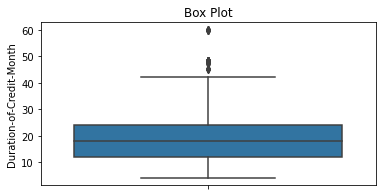

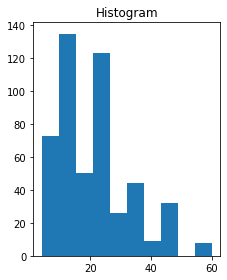

In [30]:
numerical_explore(dataset, "Duration-of-Credit-Month")


Summary Statistics 

len       500.000000
min         1.000000
max         4.000000
median      3.000000
mean        3.010000
std         1.113724
Name: Instalment-per-cent, dtype: float64
Missing values: 0


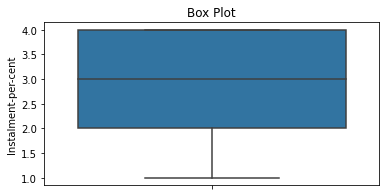

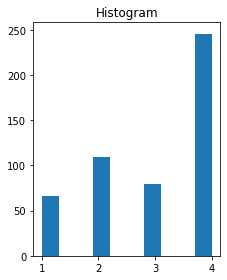

In [31]:
numerical_explore(dataset, "Instalment-per-cent")


Summary Statistics 

len         500.000000
min         276.000000
max       18424.000000
median     2236.500000
mean       3199.980000
std        2831.386861
Name: Credit-Amount, dtype: float64
Missing values: 0


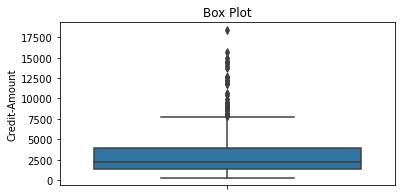

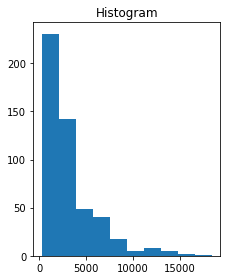

In [32]:
numerical_explore(dataset, "Credit-Amount")


Summary Statistics 

len       500.000000
min         1.000000
max         4.000000
median      2.000000
mean        2.660256
std         1.150017
Name: Duration-in-Current-address, dtype: float64
Missing values: 344


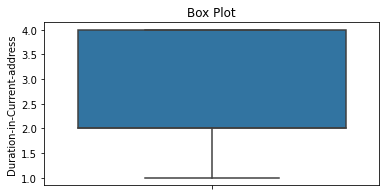

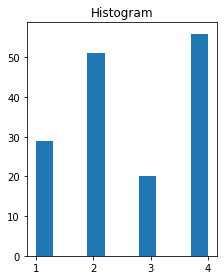

In [33]:
numerical_explore(dataset, "Duration-in-Current-address")

Summary Statistics 

len       500.000000
min         1.000000
max         4.000000
median      3.000000
mean        2.360000
std         1.064268
Name: Most-valuable-available-asset, dtype: float64
Missing values: 0


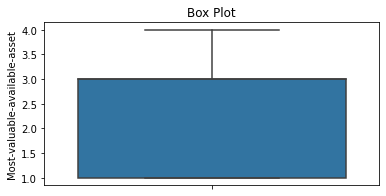

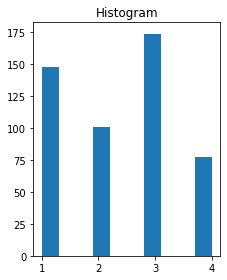

In [34]:
numerical_explore(dataset, "Most-valuable-available-asset")

Summary Statistics 

len       500.000000
min        19.000000
max        75.000000
median     33.000000
mean       35.637295
std        11.501522
Name: Age-years, dtype: float64
Missing values: 12


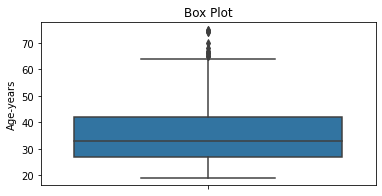

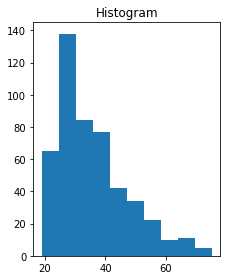

In [35]:
numerical_explore(dataset, "Age-years")

Summary Statistics 

len       500.000000
min         1.000000
max         3.000000
median      2.000000
mean        1.928000
std         0.539814
Name: Type-of-apartment, dtype: float64
Missing values: 0


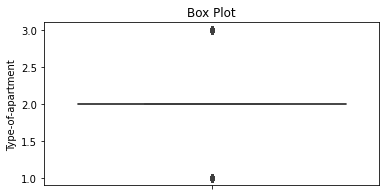

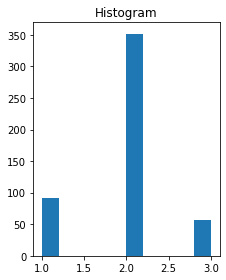

In [36]:
numerical_explore(dataset, "Type-of-apartment")

Summary Statistics 

len       500.0
min         1.0
max         1.0
median      1.0
mean        1.0
std         0.0
Name: Occupation, dtype: float64
Missing values: 0


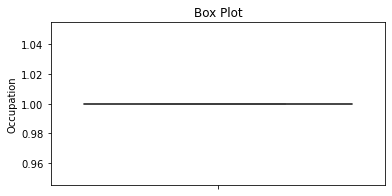

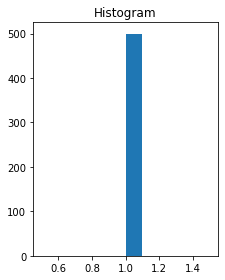

In [37]:
numerical_explore(dataset, "Occupation")


Summary Statistics 

len       500.000000
min         1.000000
max         2.000000
median      1.000000
mean        1.400000
std         0.490389
Name: Telephone, dtype: float64
Missing values: 0


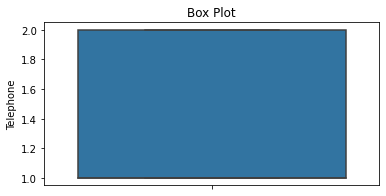

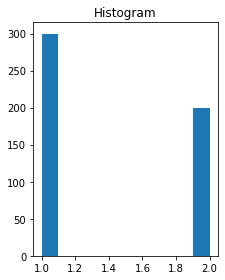

In [38]:
numerical_explore(dataset, "Telephone")

Summary Statistics 

len       500.000000
min         1.000000
max         2.000000
median      1.000000
mean        1.038000
std         0.191388
Name: Foreign-Worker, dtype: float64
Missing values: 0


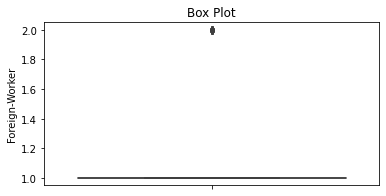

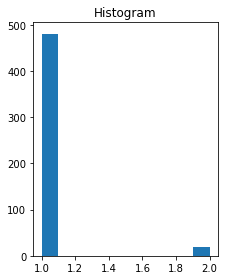

In [39]:
numerical_explore(dataset, "Foreign-Worker")

#### CHECKING FOR CORRELATION BETWEEN NUMERICAL VARIABLES


In [40]:
cor = numerical_var.corr()

In [41]:
plt.figure(figsize = (10,7))
matrix = np.triu(cor)
sns.heatmap(cor, annot = True, cmap = 'cool', mask = )
plt.title("Heatmap showing the correlation between the variables")
plt.show()



# #creating a mask to keep only the half of the correlation table

# mask =np.triu(np.ones_like(cor,dtype = bool))
# plt.heatmap(cor, annot = cor, mask= mask,cmap = "Jet", linewidths= 1, fmt =".2f",cbar_kws = ("shrink": .8))

SyntaxError: invalid syntax (<ipython-input-41-a510dbce6fca>, line 3)

### Replacing the missing values of the Age-years variable with the median of ages

In [ ]:
dataset['Age-years'].fillna(np.round(dataset['Age-years'].median(), 0), inplace=True)

In [ ]:
dataset.head(4)

## DATA PREPROCESSING FOR MODELLING

In [ ]:
dataset.drop(columns=['Occupation', 'Telephone','Concurrent-Credits',\
                        'Duration-in-Current-address','Guarantors',\
                       'No-of-dependents','Foreign-Worker'], axis=1, inplace = True)

In [ ]:
dataset.head(3)

In [ ]:
# counting the different variables under the Purpose column.
dataset["Purpose"].value_counts()

In [ ]:
# replacing the"other" values with "Used cars"
dataset["Purpose"].replace({"Other":"Used car"},inplace=True) 

In [ ]:
dataset['Purpose'].value_counts()

#### Converting categorical variables into dummies 

In [ ]:
dataset1= pd.get_dummies(dataset, columns = ['Credit-Application-Result', 'Account-Balance',
       'Payment-Status-of-Previous-Credit', 'Purpose', 'Value-Savings-Stocks',
       'Length-of-current-employment','No-of-Credits-at-this-Bank'], drop_first = True)

In [ ]:
dataset1.info()

In [ ]:
dataset.head(3)

#### Splitting the data into Target Variable and Predictors

In [ ]:
X = dataset1.drop(['Credit-Application-Result_Non-Creditworthy'], axis=1)
y = dataset1['Credit-Application-Result_Non-Creditworthy']

#### Splitting the data into train and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, stratify=y,random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

## MODELLING 


### 1. DECISION TREE CLASSIFIER


In [ ]:
# Tunning the hyper parameter with gridsearch and cross validation

# Instantiating the model

tree = DecisionTreeClassifier(random_state = 0)
param_grid = {"max_features": [1,2,3,4,5,6,7,8,9,10], "max_leaf_nodes":[1,2,3,4,5,6,7,8,9,10]}
grid_tree = GridSearchCV(tree,param_grid = param_grid, cv = 6)
grid_tree.fit(X_train,y_train)

print("Best Cross-Validation Accuracy and Parameter")
print("*********************************************************")
print("Best cross-validation accuracy: {:.2f}".format(grid_tree.best_score_))
print("Best parameter:", grid_tree.best_params_)
print("*********************************************************")

In [45]:
# Instantiating the modelling by incorporating the best parameters
tree = DecisionTreeClassifier(max_features = 4, max_leaf_nodes = 5,random_state = 0)

# fitting the model 
tree.fit(X_train,y_train)

#accuracies of train and test scores
tr_acc = tree.score(X_train,y_train)
te_acc = tree.score(X_test,y_test)

print("train accuracy: {:.2f}".format(tr_acc))
print("test_accuracy: {:.2f}".format(te_acc))

print("Percentage of overfitting: {:.2f}%".format(((tr_acc-te_acc)/tr_acc*100)))
tree_prediction = grid_tree.predict(X_test)

NameError: name 'X_train' is not defined

### 2. LOGISTIC REGRESSION


In [44]:
# hyperparameter tunning with grid search and cross validation for Logistic regression

# instantiating the logistic regression model

lrg = LogisticRegression()
param_grid = {'C':[0.01,0.05,0.5,0.1,1,5,10,50,70,100]}
grid_lr = GridSearchCV(lrg, param_grid, cv = 6)
grid_lr.fit(X_train, y_train)

print("Best Cross-Validation Accuracy and Parameter")
print("*********************************************************")
print("Best cross-validation accuracy: {:.2f}".format(grid_lr.best_score_))
print("Best parameter:", grid_lr.best_params_)
print("*********************************************************")


NameError: name 'X_train' is not defined

In [ ]:
# Logistic Regression with tuned hyper-parameter

# instantiating the Logistic Regression
lrg = LogisticRegression( C = 10)

# fitting the model
lrg.fit(X_train, y_train)

# accuracy score for train and test

lrg_train_acc = lrg.score(X_train, y_train)
lrg_test_acc = lrg.score(X_test, y_test)

print("Train Accuracy: {:.2f}".format(lrg_train_acc))
print("Test Accuracy: {:.2f} ".format(lrg_test_acc))
print("Percentage of overfitting {:.2f}%".format(((lrg_train_acc-lrg_test_acc)/lrg_train_acc*100)))

lrg_prediction=grid_lr.predict(X_test)

### 3. SUPPORT VECTOR MACHINE

In [ ]:
# hyperparameter tuning with pipeline
# the pipeline was used here because there was the need for the data to be scaled before the model is applied on it.
# the standardscaler will be used in this instance. 

pipe  = Pipeline([("Scaler", StandardScaler()), ("SVC", SVC(probability=True))])
param_grid = {"SVC__C":[0.001,0.01,0.1,1,10,100], "SVC__gamma":[0.001, 0.01,0.1,1,10,100]}
grid_svc = GridSearchCV(pipe, param_grid = param_grid, cv = 6)
grid_svc.fit(X_train, y_train)

print("Best Cross-Validation Accuracy and Parameter")
print("*********************************************************")
print("Best cross-validation accuracy: {:.2f}".format(grid_svc.best_score_))
print("Best parameter:", grid_svc.best_params_)
print("*********************************************************")

In [ ]:
# modelling with SVC using tuned hyperparaeter

# instantiating the SVC model
svc = Pipeline([("Scaler",StandardScaler()), ("SVC",SVC(C=100,gamma=0.001,probability=True))])
svc_model = svc.fit(X_train,y_train)

svc_train_score = svc.score(X_train, y_train)
svc_test_score = svc.score(X_test, y_test)

print("Train Accuracy: {:.2f}".format(svc_train_score))
print("Test Accuracy: {:.2f} ".format(svc_test_score))
print("Percentage of overfitting {:.2f}%".format(((svc_train_score-svc_test_score)/svc_train_score*100)))

svc_prediction=grid_svc.predict(X_test)

### 4. RANDOM FOREST CLASSIFIER

In [ ]:
# hyperparameter tunning
# the parameters used here are max_depth and max_features

# instantiating the Random Forest Model

rfc  = RandomForestClassifier(random_state = 0)
param_grid = {"max_depth":[1,2,3,4,5,6,7,8,9,10], 
              "max_features":[1,2,3,4,5,6,7,8,9,10], 
              "max_leaf_nodes": [1,2,3,4,5,6,7,8,9,10]}

grid_rfc = GridSearchCV(rfc, param_grid = param_grid, cv= 6)

# fitting the model to get the best parameters
grid_rfc.fit(X_train, y_train)
print("Best Cross-Validation Accuracy and Parameter")
print("*********************************************************")
print("Best cross-validation accuracy: {:.2f}".format(grid_rfc.best_score_))
print("Best parameter:", grid_rfc.best_params_)
print("*********************************************************")

In [ ]:
# modelling with the tuned parameters

# Instanstiating the Random Forest Model
rfc = RandomForestClassifier(max_depth=4, max_features=8, max_leaf_nodes=7)

# fitting the model to the data
rfc.fit(X_train, y_train)

rfc_train_score = rfc.score(X_train,y_train)
rfc_test_score = rfc.score(X_test, y_test)

print("Train Accuracy: {:.2f}".format(rfc_train_score))
print("Test Accuracy: {:.2f} ".format(rfc_test_score))
print("Percentage of overfitting {:.2f}%".format(((rfc_train_score-rfc_test_score)/rfc_train_score*100)))

rfc_prediction=grid_rfc.predict(X_test)

### 5. GRADIENT BOOSTING CLASSIFIER

In [ ]:
# hyperparameter tunning  
gbc = GradientBoostingClassifier(n_estimators = 300, max_depth=1, random_state=0)
param_grid = {"max_features":[1,2,3,4,5,6,7,8,9,10],
           "max_leaf_nodes":[1,2,3,4,5,6,7,8,9,10]}
grid_gbc = GridSearchCV(gbc, param_grid = param_grid, cv = 6)

grid_gbc.fit(X_train,y_train)

# fitting the model to get the best parameters
grid_gbc.fit(X_train, y_train)
print("Best Cross-Validation Accuracy and Parameter")
print("*********************************************************")
print("Best cross-validation accuracy: {:.2f}".format(grid_gbc.best_score_))
print("Best parameter:", grid_gbc.best_params_)
print("*********************************************************")

In [ ]:
# Instantiating the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators = 300, max_depth=1,random_state=0)

# fit the model to the data
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

gbc_train_acc = gbc.score(X_train, y_train)
gbc_test_acc = gbc.score(X_test, y_test)

print("Train Accuracy: {:.2f}".format(gbc_train_acc))
print("Test Accuracy: {:.2f} ".format(gbc_test_acc))
print("Percentage of overfitting {:.2f}%".format(((gbc_train_acc-gbc_test_acc)/gbc_train_acc*100)))

gbc_prediction=grid_gbc.predict(X_test)

### 6. ADABOOST CLASSIFER

In [ ]:
#instantiating Decision Tree as the base estimator
dt = DecisionTreeClassifier(max_depth = 1, random_state = 0)

# Instantiating the AdaBoost classifier
adb_clf = AdaBoostClassifier(base_estimator=dt,n_estimators =60, random_state = 0 )

#fitting the AdaBoost model to the data
adb_clf.fit(X_train,y_train)

print("Train Accuracy of ADB_clf: {:.2f}".format(adb_clf.score(X_train,y_train)))
print("Test Accuracy ADB_clf: {:.2f} ".format(adb_clf.score(X_test,y_test)))
# print("Percentage of overfitting {:.2f}%".format(((adb_clf_train_acc-gbc_test_acc)/gbc_train_acc*100)))

adb_clf_prediction= adb_clf.predict(X_test)


## MODEL SELECTION

In [ ]:
from sklearn.metrics import confusion_matrix

print("\nDecision Tree:")
print(confusion_matrix(y_test, tree_prediction))


print("\nLogistic Regression:")
print(confusion_matrix(y_test, lrg_prediction))

print("\nSVC:")
print(confusion_matrix(y_test, svc_prediction))

print("\nRandom Forest:")
print(confusion_matrix(y_test, rfc_prediction))

print("\nGradient Boost:")
print(confusion_matrix(y_test, gbc_prediction))

print("\nAda Boost:")
print(confusion_matrix(y_test, adb_clf_prediction))

In [ ]:
y_test.value_counts()

## CLASSIFICATION REPORT

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_prediction, target_names=["Creditworthy", "Not Creditworthy"]))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lrg_prediction, target_names=["Creditworthy", "Not Creditworthy"]))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, svc_prediction, target_names=["Creditworthy", "Not Creditworthy"]))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rfc_prediction, target_names=["Creditworthy", "Not Creditworthy"]))

In [ ]:

from sklearn.metrics import classification_report

print(classification_report(y_test, gbc_prediction, target_names=["Creditworthy", "Not Creditworthy"]))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, adb_clf_prediction, target_names=["Creditworthy", "Not Creditworthy"]))

#### From the classification table, an assessment of the f1-score showed that Support Vector Machine and Random Forest Classifier are the best models with the same score of 0.86. 

#### However, the confusion mattrix was used as tie-breaker. They both had good True Positive prediction the SVC maintained a better balance in predicting between the credit-worthy and non-credit-worthy. 

#### Hence, the choice to select SVC as the best model.

## MODEL EVALUATION

The evaluation metrics to be used are:

* F1 score
* Precision
* ROC
* Training Score
* Test Score
* Confusion Matrix

### PLOTTING THE ROC CURVE

In [ ]:
r_probs = [0 for i in range(len(y_test))]
tree_probs = tree.predict_proba(X_test)
lrg_probs = lrg.predict_proba(X_test)
svc_probs = svc.predict_proba(X_test)
rfc_probs = rfc.predict_proba(X_test)
gbc_probs = gbc.predict_proba(X_test)
adb_clf_probs = adb_clf.predict_proba(X_test)

tree_probs = tree_probs[:,1]
lrg_probs = lrg_probs[:, 1]
svc_probs = svc_probs[:, 1]
rfc_probs = rfc_probs[:,1]
gbc_probs = gbc_probs[:, 1]
adb_clf_probs = adb_clf_probs[:, 1]

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
tree_fpr, tree_tpr, _ = roc_curve(y_test,tree_probs)
lrg_fpr, lrg_tpr, _ = roc_curve(y_test, lrg_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)#
rfc_fpr, rfc_tpr, _ = roc_curve(y_test,rfc_probs)
gbc_fpr, gbc_tpr, _ = roc_curve(y_test,gbc_probs)
adb_clf_fpr, adb_clf_tpr, _ = roc_curve(y_test,adb_clf_probs)


r_auc = roc_auc_score(y_test, r_probs)
tree_auc = roc_auc_score(y_test, tree_probs)
lrg_auc = roc_auc_score(y_test,lrg_probs)
svc_auc = roc_auc_score(y_test,svc_probs)
rfc_auc = roc_auc_score(y_test,rfc_probs)
gbc_auc = roc_auc_score(y_test, gbc_probs)
adb_clf_auc = roc_auc_score(y_test,adb_clf_probs)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(tree_fpr, tree_tpr, marker='_', label='Decision Tree(AUROC = %0.3f)' % tree_auc)
plt.plot(lrg_fpr, lrg_tpr, marker='_', label='Logistic Regression(AUROC = %0.3f)' % lrg_auc)
plt.plot(svc_fpr, svc_tpr, marker='_', label='SVC(AUROC = %0.3f)' % svc_auc)
plt.plot(rfc_fpr, rfc_tpr, marker='_', label='Random Forest(AUROC = %0.3f)' % rfc_auc)
plt.plot(gbc_fpr, gbc_tpr, marker='_', label='Gradient Boosting(AUROC = %0.3f)' % gbc_auc)
plt.plot(adb_clf_fpr, adb_clf_tpr, marker='_', label='AdaBoost(AUROC = %0.3f)' % adb_clf_auc)

import matplotlib.pyplot as plt

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() 
# Show plot
plt.show()

### PREDICTION WITH THE TEST DATASET

#### IMPORTING THE TEST DATASET

In [ ]:
test_set = pd.read_excel("customers-to-score.xlsx")

In [ ]:
test_set.shape

In [ ]:
test_set.head(4)

In [ ]:
test_set.info()

In [ ]:
test_set.isnull().sum()

### DROPPINGTHE IRRELEVANT VARIABLES

In [ ]:
test_set.drop(columns=['Occupation', 'Telephone','Concurrent-Credits',\
                        'Duration-in-Current-address','Guarantors',\
                       'No-of-dependents','Foreign-Worker'], axis=1, inplace = True)

In [ ]:
test_set.head(3)

In [ ]:
# replacing the"other" values with "Used cars"
test_set["Purpose"].replace({"Other":"Used car"},inplace=True) 

#### CONVERTING CATERGORICAL VARIABLES TO DUMMY VARIABLES


In [ ]:
test_set= pd.get_dummies(test_set, columns = ['Account-Balance',
       'Payment-Status-of-Previous-Credit', 'Purpose', 'Value-Savings-Stocks',
       'Length-of-current-employment','No-of-Credits-at-this-Bank'], drop_first = True)

In [ ]:
test_set

In [ ]:
test_set.info()

In [ ]:
test_set.head(1)

In [ ]:
test_set1 = test_set
test_set["Credit-Application-Result"] = svc.predict(test_set)

In [ ]:
test_set["Credit-Application-Result"].replace({0: "Creditworthy", 1: "Non-Creditworthy"},inplace = True)

In [ ]:
test_set["Credit-Application-Result"].value_counts()

In [ ]:
results = test_set["Credit-Application-Result"]

In [ ]:
results.to_csv("Theophilus_Loan Eligibility Prediction.csv", index=False)